# Time Series Week 12 - Assignment

## 1. Time Domain

### 1.1 Numerical Data

#### 1.1.1 Dataset Information
**Task:** Print the information about the dataset.

In [16]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Import Libraries
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download stock data using yfinance from 2020-01-01 to 2023-01-01
aapl_data = yf.download("AAPL", start='2020-01-01', end='2023-01-01')

# Print dataset info
print(aapl_data.info())
print(aapl_data.head())


[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-01-02 00:00:00+00:00 to 2022-12-30 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  756 non-null    float64
 1   (Close, AAPL)      756 non-null    float64
 2   (High, AAPL)       756 non-null    float64
 3   (Low, AAPL)        756 non-null    float64
 4   (Open, AAPL)       756 non-null    float64
 5   (Volume, AAPL)     756 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.3 KB
None
Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2020-01-02 00:00:00+00:00  72.796013  75.087502  75.150002  73.797501   
2020-01-03 00:00:00+00:00  72.088295  74.357498  75.144997  74.125000   
2020-01-06 00:00:00+00:00  72.662720  74.9

#### 1.1.2 Data Visualization
**Task:** Visualize the actual data

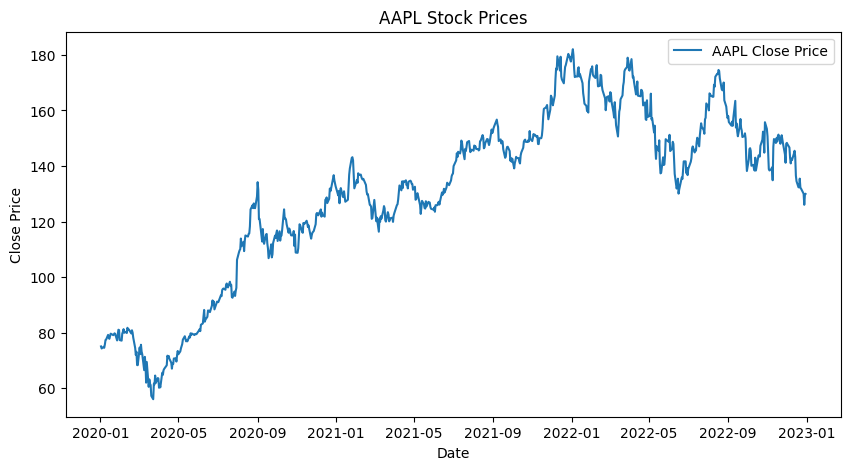

In [39]:
# Plot the 'Close' price over time
aapl_data['Date'] = aapl_data.index
plt.figure(figsize=(10, 5))
plt.plot(aapl_data['Date'], aapl_data['Close'], label='AAPL Close Price')
plt.title('AAPL Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


#### 1.1.3 Distinct and Overlapped Rolling Windows
**Task:** Visualize distinct and overlapped rolling windows

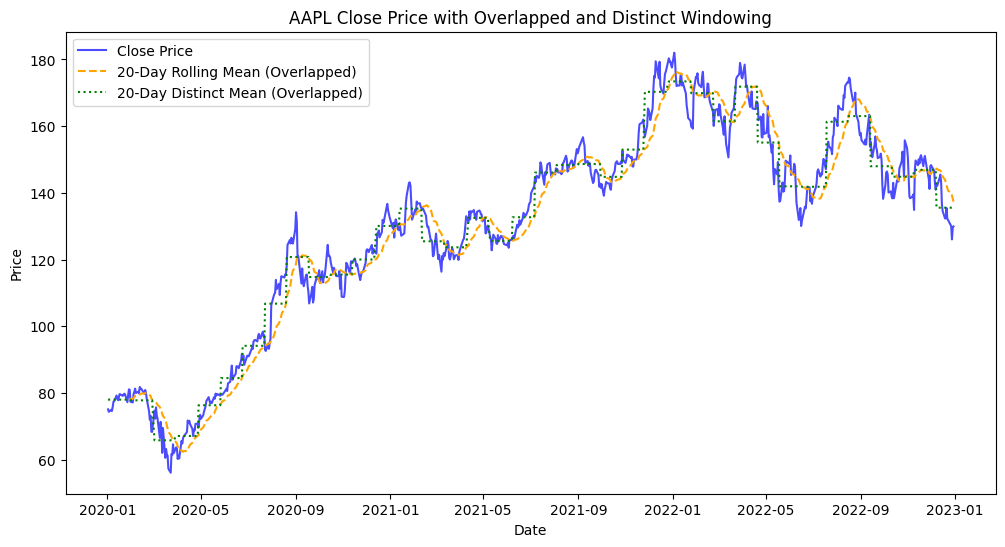

In [40]:
# Ensure 'Close' column exists and drop missing data

# Define window size (20)
window_size=20

# Calculate Overlapped Windowing (Rolling Mean and Standard Deviation)
close_rolling_mean = aapl_data['Close'].rolling(window=window_size).mean()
close_rolling_ste = aapl_data['Close'].rolling(window=window_size).std()

# Calculate Distinct Windowing (Mean and Standard Deviation)
group_ids = (pd.Series(range(len(aapl_data['Close'])), index=aapl_data['Close'].index) // window_size)
close_distinct_mean = aapl_data['Close'].groupby(group_ids).transform("mean")
close_distinct_std = aapl_data['Close'].groupby(group_ids).transform("std")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(aapl_data['Close'], label='Close Price', alpha=0.7, color='blue')
plt.plot(close_rolling_mean, label='20-Day Rolling Mean (Overlapped)', linestyle='--', color='orange')
plt.plot(close_distinct_mean, label='20-Day Distinct Mean, linestyle=':', color='green')
plt.title('AAPL Close Price with Overlapped and Distinct Windowing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### 1.2 Categorical Data

#### 1.2.1 One-Hot Encoding
**Task:** Perform one-hot encoding on a given categorical dataset and print the outcome.

In [43]:
# Import QS University Rankings Dataset from Shared Drives
QS_data = pd.read_csv('/content/drive/Shareddrives/timeseries-datasets/qs_university.csv')
QS_data.head()

,University,Country
0,Massachusetts Institute of Technology (MIT),United States
1,Imperial College London,United Kingdom
2,University of Oxford,United Kingdom
3,Harvard University,United States
4,University of Cambridge,United Kingdom


In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# Perform One-hot encoding for "Country" Column
QS_data_encoded = pd.get_dummies(QS_data, columns=['Country'], prefix='Country')

# Print the result
print(QS_data_encoded)

                                     University  Country_Australia  \
0   Massachusetts Institute of Technology (MIT)              False   
1                       Imperial College London              False   
2                          University of Oxford              False   
3                            Harvard University              False   
4                       University of Cambridge              False   
..                                          ...                ...   
65                         University of Ottawa              False   
66                University of Western Ontario              False   
67                       University of Victoria              False   
68                      Simon Fraser University              False   
69                            McGill University              False   

    Country_Canada  Country_China  Country_Denmark  Country_Finland  \
0            False          False            False            False   
1            Fals

#### 1.2.2 Dummy Variables
**Task:** Perform dummy variable encoding on the same categorical dataset and print the outcome.

In [46]:
# Perform dummy encoding for the "Country" column


QS_data_encoded = pd.get_dummies(QS_data, columns=['Country'], prefix='Country', drop_first=True)

# Display the result
print(QS_data_encoded)

                                     University  Country_Canada  \
0   Massachusetts Institute of Technology (MIT)           False   
1                       Imperial College London           False   
2                          University of Oxford           False   
3                            Harvard University           False   
4                       University of Cambridge           False   
..                                          ...             ...   
65                         University of Ottawa            True   
66                University of Western Ontario            True   
67                       University of Victoria            True   
68                      Simon Fraser University            True   
69                            McGill University            True   

    Country_China  Country_Denmark  Country_Finland  Country_Hong Kong  \
0           False            False            False              False   
1           False            False            F

### 1.3 Pattern Mining

In [48]:
aapl_data.columns = [col[0] if isinstance(col, tuple) else col for col in aapl_data.columns]
aapl_data.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Date'], dtype='object')

In [49]:
# Ensure the "Close" column is used and index is reset
from scipy.signal import find_peaks

close_prices = aapl_data['Close'].reset_index(drop=True).values
close_prices = close_prices.flatten()

height_threshold = 150
peaks, properties = find_peaks(close_prices, height=height_threshold)

# Calculate peak count and support
peak_count = len(peaks)
support = peak_count / len(close_prices)

# Output only the Peak Count and Support as text
print(f"Peak Count: {peak_count}, Support: {support:.2f}")

Peak Count: 54, Support: 0.07


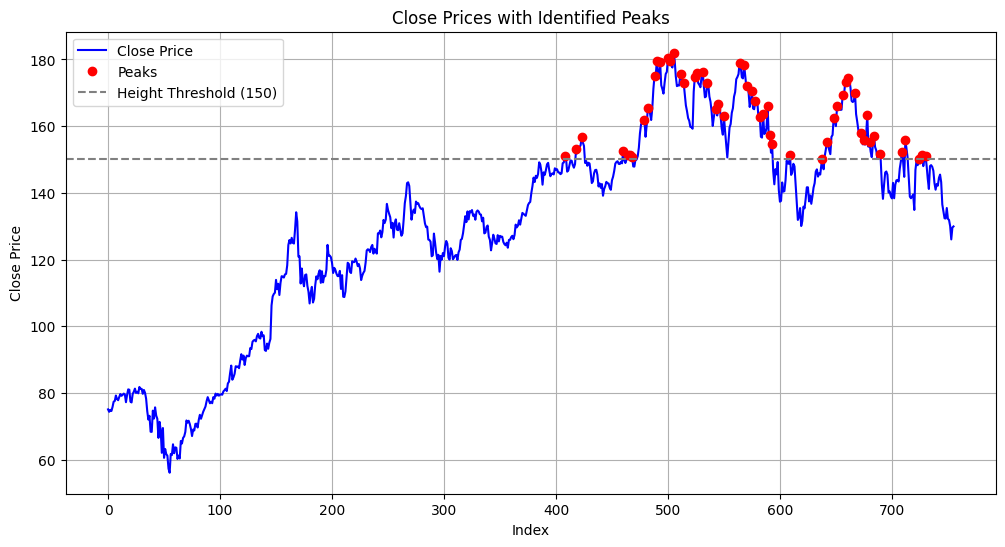

In [50]:
# Plot the Close price data and peaks
plt.figure(figsize=(12, 6))
plt.plot(close_prices, label='Close Price', color='blue')
plt.plot(peaks, close_prices[peaks], "ro", label='Peaks')
plt.axhline(y=height_threshold, color='gray', linestyle='--', label=f'Height Threshold ({height_threshold})')
plt.title('Close Prices with Identified Peaks')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()


## 2. Frequency Domain

### 2.1 Fourier Transform
**Task:** Decompose the time series into its frequency components to reveal possible periodic patterns or trends and visualize the results.

In [52]:
aapl_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-01-02 00:00:00+00:00 to 2022-12-30 00:00:00+00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Adj Close  756 non-null    float64            
 1   Close      756 non-null    float64            
 2   High       756 non-null    float64            
 3   Low        756 non-null    float64            
 4   Open       756 non-null    float64            
 5   Volume     756 non-null    int64              
 6   Date       756 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 47.2 KB


In [53]:
close_data = aapl_data['Close']
close_data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 756 entries, 2020-01-02 00:00:00+00:00 to 2022-12-30 00:00:00+00:00
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
756 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [54]:
close_data = aapl_data['Close']
print(close_data.head())

Date
2020-01-02 00:00:00+00:00    75.087502
2020-01-03 00:00:00+00:00    74.357498
2020-01-06 00:00:00+00:00    74.949997
2020-01-07 00:00:00+00:00    74.597504
2020-01-08 00:00:00+00:00    75.797501
Name: Close, dtype: float64


In [55]:
close_data = close_data.to_numpy()

In [56]:
# Extract the "Close" price for AAPL

# Perform Fourier Transform

# Visualize the frequency components

from scipy.fft import fft, fftfreq

sampling_rate = 1
N = len(close_data)

yf = fft(close_data)
xf = fftfreq(N, d=1/sampling_rate)[:N//2]


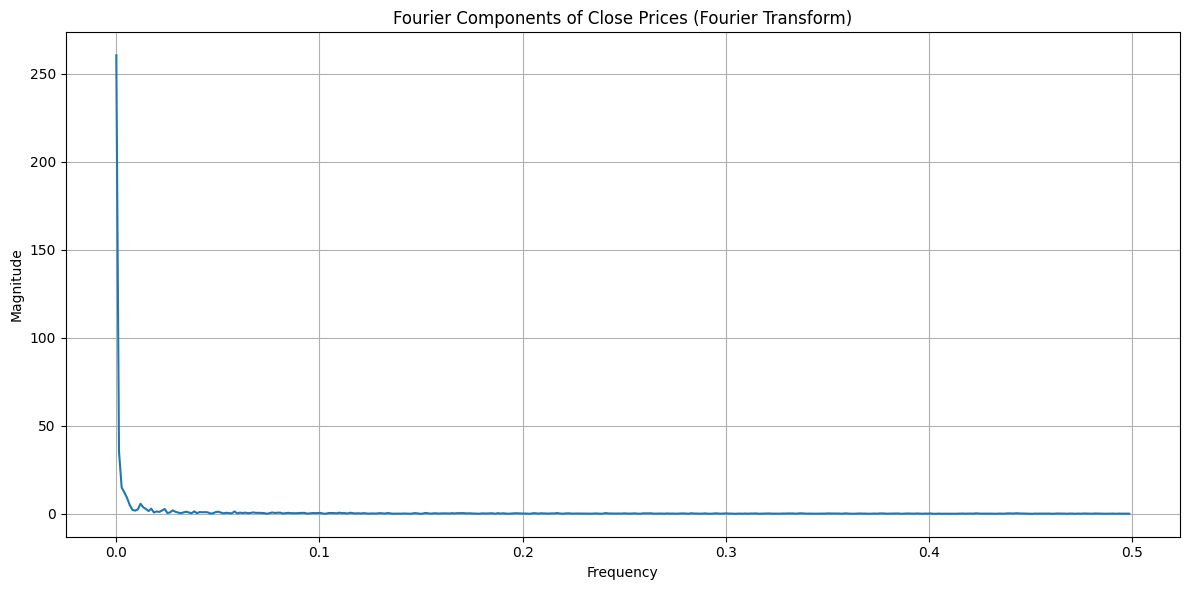

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]), label='FFT Magnitude')
plt.title('Fourier Components of Close Prices (Fourier Transform)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()

### 2.2 Time Entropy
**Task:** Calculate the entropy of the time series to measure its randomness.

In [63]:
close_data = aapl_data['Close']
print(close_data.head())

Date
2020-01-02 00:00:00+00:00    75.087502
2020-01-03 00:00:00+00:00    74.357498
2020-01-06 00:00:00+00:00    74.949997
2020-01-07 00:00:00+00:00    74.597504
2020-01-08 00:00:00+00:00    75.797501
Name: Close, dtype: float64


In [64]:
# Extract the "Close" prices and calculate relative frequency distribution

# Calculate entropy
from collections import Counter

def shannon_entropy(data):
    # Count the frequency of each value in the data
    counts = Counter(data)
    # Calculate probabilities
    probabilities = np.array(list(counts.values())) / len(data)
    # Calculate Shannon Entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Calculate Shannon Entropy for
entropy_value = shannon_entropy(close_data)
print(f'Time Series Entropy: {entropy_value:.4f}')

Time Series Entropy: 9.4819


## 3. Mobility Data Processing

In [65]:
import pandas as pd
import numpy as np
import folium
from sklearn.cluster import KMeans
from scipy.stats import entropy
from IPython.display import HTML, display

# Import the geo_coordinates dataset

geo_coordinates_data = pd.read_csv('/content/drive/Shareddrives/timeseries-datasets/geo_coordinates.csv')
geo_coordinates_data.head()


,id,longitude,latitude,trip_category
0,1,126.977148,37.572670,1
1,2,126.977159,37.570170,1
2,3,126.977127,37.568800,1
3,4,126.977234,37.565807,1
4,5,126.982555,37.565943,1


### 3.1 Data Visualization
**Task:** Preview the GPS coordinates on the Map.

In [61]:
# Calculate the center of the GPS points
longitude_center = 126.9630927
latitude_center = 37.560818

# Create a Folium map with fixed dimensions
map_initial = folium.Map(
    location=[latitude_center, longitude_center],
    zoom_start=16,
    width="1000px",  # Set explicit width
    height="600px"   # Set explicit height
)

# Add GPS points to the map
for _, row in geo_coordinates_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_opacity=0.7
    ).add_to(map_initial)

# Display the map inline in the notebook
display(HTML(map_initial._repr_html_()))

### 3.2 Clustering GPS Coordinates
**Task:** Perform clustering on GPS coordinates using K-Means or DBSCAN to identify groups of locations.

In [70]:
# Perform clustering (3 clusters)

kmeans = KMeans(n_clusters=3, random_state=42)
geo_coordinates_data['Cluster'] = kmeans.fit_predict(geo_coordinates_data[['latitude', 'longitude']])

# Center map on mean latitude and longitude
latitude_center = geo_coordinates_data['latitude'].mean()
longitude_center = geo_coordinates_data['longitude'].mean()

# Display clustered GPS data on a map
map_clustered = folium.Map(location=[latitude_center, longitude_center], zoom_start=14)
colors = ['red', 'blue', 'green']  # Add more colors if clusters > 3

for _, row in geo_coordinates_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=colors[int(row['Cluster'])],
        fill=True,
        fill_opacity=0.7
    ).add_to(map_clustered)

# Display the map
display(map_clustered)

### 3.3 Interpolation GPS Coordinates
**Task:** Perform linear interpolation to fill in missing GPS coordinates in the dataset.

In [71]:
geo_coordinates_data.info

<bound method DataFrame.info of     id   longitude   latitude  trip_category  cluster  Cluster
0    1  126.977148  37.572670              1        0        1
1    2  126.977159  37.570170              1        1        1
2    3  126.977127  37.568800              1        1        1
3    4  126.977234  37.565807              1        2        1
4    5  126.982555  37.565943              1       -1        1
..  ..         ...        ...            ...      ...      ...
78  79  126.973457  37.538588              3       -1        1
79  80  126.972427  37.533688              3       -1        1
80  81  126.969337  37.530149              3       -1        1
81  82  126.964531  37.526065              3       -1        1
82  83  126.961784  37.521980              3       -1        1

[83 rows x 6 columns]>

In [80]:


# Define the interpolate_path function
def interpolate_path(latitudes, longitudes, num_points=100):
    """Interpolate GPS points between given latitudes and longitudes."""
    latitudes = np.array(latitudes)
    longitudes = np.array(longitudes)
    t = np.linspace(0, 1, len(latitudes))
    interp_t = np.linspace(0, 1, num_points)
    interp_lat = np.interp(interp_t, t, latitudes)
    interp_lon = np.interp(interp_t, t, longitudes)
    return interp_lat, interp_lon

# Filter the data for a specific trip category
trip_data = geo_coordinates_data[geo_coordinates_data['trip_category'] == 1]

# Extract latitudes and longitudes for interpolation
latitudes = trip_data['latitude'].values
longitudes = trip_data['longitude'].values

# Ensure the trip data is sorted (if necessary)
trip_data = trip_data.sort_values(by='id')

# Generate interpolated GPS points
interp_lat, interp_lon = interpolate_path(latitudes, longitudes, num_points=200)

# Create an interactive map with Folium
latitude_center = trip_data['latitude'].mean()
longitude_center = trip_data['longitude'].mean()

map_interpolated = folium.Map(location=[latitude_center, longitude_center], zoom_start=14)

# Add original GPS points
for _, row in trip_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_opacity=0.7,
        tooltip="Original Point"
    ).add_to(map_interpolated)

# Add interpolated GPS path
for lat, lon in zip(interp_lat, interp_lon):
    folium.CircleMarker(
        location=[lat, lon],
        radius=2,
        color='red',
        fill=True,
        fill_opacity=0.5,
        tooltip="Interpolated Point"
    ).add_to(map_interpolated)

# Display the map
map_interpolated

## 4. Text Data Processing

### 4.1 Bag of Words
**Task:** Represent text data as the frequency of occurrence of words using the Bag of Words technique and print the results.

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

# Import twitter tweets Dataset
tweets_data = pd.read_csv('/content/drive/Shareddrives/timeseries-datasets/travel_tweets.csv')
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             50 non-null     object
 1   username         50 non-null     object
 2   content          50 non-null     object
 3   number_of_likes  50 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


In [77]:
# Initialize a CountVectorizer to convert text data into a bag-of-words (BoW) representation
# Fit the vectorizer to the 'content' column and transform it into a sparse matrix
# Get the feature names (words in the vocabulary)
# Convert the sparse matrix to a DataFrame for visualization, with feature names as column headers



vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tweets_data['content'])

# Bag-of-Words 행렬을 배열로 변환
bow_array = X.toarray()

# Bag-of-Words 행렬을 DataFrame으로 변환
feature_names = vectorizer.get_feature_names_out()  # 단어 목록
bow_df = pd.DataFrame(bow_array, columns=feature_names)

# DataFrame 출력
print(bow_df)

    across  amazing  backpacking  beauty  been  begins  believe  can  \
0        0        0            0       0     0       0        0    0   
1        0        0            0       0     0       0        0    0   
2        0        1            0       0     0       0        0    0   
3        0        1            0       0     0       0        0    0   
4        0        0            0       1     0       0        1    1   
5        0        0            0       0     0       0        0    0   
6        1        0            1       0     0       0        0    0   
7        0        0            0       0     0       1        0    0   
8        0        0            0       0     1       0        0    0   
9        0        0            0       0     1       0        0    0   
10       0        0            0       0     1       0        0    0   
11       0        0            0       0     0       0        0    0   
12       1        0            1       0     0       0        0 

### 4.2 Sentence Embeddings
**Task:** Generate sentence-by-sentence embeddings representing the meaning of each sentence in vector space using a pre-trained BERT model.

In [78]:
from sentence_transformers import SentenceTransformer

# Load Sentence Bert Model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Create Sentence Embedding
sentence_embeddings = model.encode(tweets_data['content'])

# Print Sentence Embeddings
print(sentence_embeddings)

# Embedding output for each sentence
for i, embedding in enumerate(sentence_embeddings):
    print(f"Sentence {i + 1} Embedding:\n", embedding)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[[ 0.07170127  0.06019712  0.04280171 ...  0.01718822 -0.16515246
   0.00051824]
 [-0.0297517  -0.01115785 -0.00914118 ... -0.09982724 -0.21728094
  -0.04734707]
 [ 0.07041002 -0.00104526  0.09900298 ... -0.01354883 -0.0664726
   0.03022696]
 ...
 [ 0.0752414   0.0269714  -0.00052051 ... -0.06139124 -0.02999088
  -0.05599318]
 [ 0.07041002 -0.00104526  0.09900298 ... -0.01354883 -0.0664726
   0.03022696]
 [-0.0297517  -0.01115785 -0.00914118 ... -0.09982724 -0.21728094
  -0.04734707]]
Sentence 1 Embedding:
 [ 7.17012733e-02  6.01971224e-02  4.28017117e-02  2.63443105e-02
  5.98325394e-02  4.42924798e-02  4.43768762e-02 -3.93416472e-02
 -5.34261055e-02 -3.91396731e-02 -1.02023175e-02  4.16354239e-02
  4.93668541e-02  4.64861915e-02 -3.00377849e-02  5.83955273e-02
  1.12056080e-02  7.84072205e-02  2.24535819e-02 -2.83294506e-02
  9.31757130e-03 -7.12067857e-02  3.17108184e-02  4.01496962e-02
  6.03336981e-03  6.73958287e-02  2.46953331e-02  2.24741604e-02
  3.15922685e-02 -7.00325519e-02